In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
x = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [5]:
geo=pd.get_dummies(df['Geography'],drop_first=True,dtype=int)

In [6]:
gen=pd.get_dummies(df['Gender'],drop_first=True,dtype=int)

In [7]:
gen.values

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [8]:
x=pd.concat([x,geo,gen],axis=1)

In [9]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [10]:
x=x.drop(['Geography','Gender'],axis=1)

In [11]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
x_t=pd.DataFrame(x_train)
x_t

,0,1,2,3,4,5,6,7,8,9,10
0,-0.681198,1.056283,-1.399411,-1.233658,-0.916701,-1.542662,0.975549,0.912741,-0.585049,1.732628,-1.095269
1,0.289129,2.011374,1.025912,1.746949,-0.916701,-1.542662,-1.025064,1.600431,-0.585049,-0.577158,0.913017
2,-1.166361,1.342810,-0.706462,-1.233658,-0.916701,0.648230,0.975549,-0.149679,-0.585049,-0.577158,-1.095269
3,-1.187006,-0.567372,-1.052937,0.902318,-0.916701,0.648230,0.975549,0.178511,-0.585049,-0.577158,0.913017
4,-1.001199,-0.758390,0.332962,-1.233658,0.812108,-1.542662,-1.025064,0.426859,-0.585049,-0.577158,0.913017
...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.794746,0.769756,1.025912,1.247561,-0.916701,0.648230,-1.025064,-1.223541,-0.585049,-0.577158,-1.095269
7996,-0.536681,-0.662881,-0.359987,0.550971,-0.916701,0.648230,0.975549,1.169977,-0.585049,-0.577158,-1.095269
7997,-1.796041,-0.662881,0.332962,0.562457,-0.916701,-1.542662,-1.025064,0.210353,-0.585049,-0.577158,-1.095269
7998,0.010418,-0.471863,-1.052937,0.217003,0.812108,-1.542662,-1.025064,1.625469,1.709260,-0.577158,0.913017


In [17]:
x_test

array([[-2.29152645,  2.20239224, -1.39941132, ..., -0.58504861,
        -0.57715782, -1.0952694 ],
       [ 1.03235762, -0.28084453,  0.33296219, ..., -0.58504861,
         1.73262835, -1.0952694 ],
       [-1.8786216 , -1.61797202, -1.39941132, ..., -0.58504861,
        -0.57715782, -1.0952694 ],
       ...,
       [-0.07216287, -0.37635363,  0.33296219, ..., -0.58504861,
         1.73262835, -1.0952694 ],
       [-0.01022714,  0.00568279, -0.70646192, ..., -0.58504861,
        -0.57715782,  0.91301738],
       [ 0.53687179, -0.94940827,  1.718861  , ..., -0.58504861,
        -0.57715782, -1.0952694 ]])

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,Dense,Dropout

In [19]:
classifier=Sequential()

In [20]:
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dense(units=1,activation='relu'))

In [21]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
early=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.2,
    patience=20,
    verbose=20,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [23]:
model=classifier.fit(x_train,y_train,validation_split=0.2,batch_size=10,epochs=100,callbacks=[early])

Epoch 1/100


640/640 [==============================] - 3s 3ms/step - loss: 0.4926 - accuracy: 0.7853 - val_loss: 0.4128 - val_accuracy: 0.8175
Epoch 2/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4472 - accuracy: 0.8023 - val_loss: 0.3800 - val_accuracy: 0.8250
Epoch 3/100
640/640 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.8131 - val_loss: 0.3703 - val_accuracy: 0.8388
Epoch 4/100
640/640 [==============================] - 1s 2ms/step - loss: 0.4059 - accuracy: 0.8219 - val_loss: 0.3607 - val_accuracy: 0.8537
Epoch 5/100
640/640 [==============================] - 1s 2ms/step - loss: 0.4132 - accuracy: 0.8267 - val_loss: 0.3512 - val_accuracy: 0.8562
Epoch 6/100
640/640 [==============================] - 2s 2ms/step - loss: 0.3903 - accuracy: 0.8308 - val_loss: 0.3524 - val_accuracy: 0.8562
Epoch 7/100
640/640 [==============================] - 2s 3ms/step - loss: 0.4001 - accuracy: 0.8363 - val_loss: 0.3526 - val_accuracy: 0.85

In [24]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

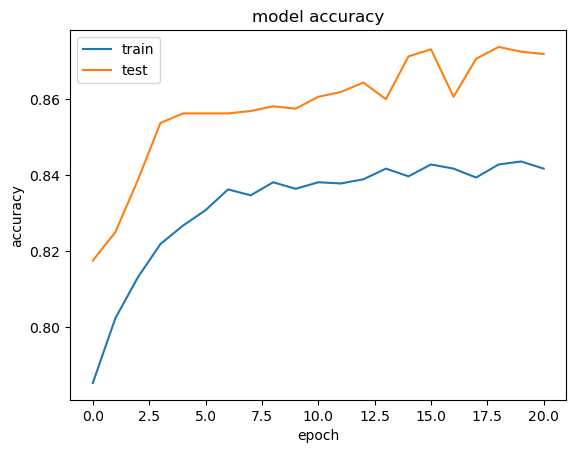

In [25]:
import matplotlib.pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

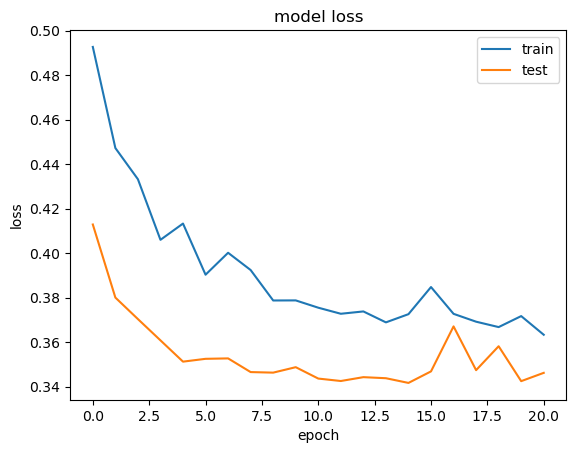

In [26]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [35]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [34]:
y_pred.dtype=int
y_pred

array([[1057259641],
       [         0],
       [1034330767],
       ...,
       [1020456743],
       [1034883838],
       [1047513492]])

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1541,   66],
       [ 211,  182]], dtype=int64)

In [37]:
score

NameError: name 'score' is not defined